# Coursework 1: Image filtering

In this coursework you will practice techniques for image filtering. The coursework includes coding questions and written questions. Please read both the text and the code in this notebook to get an idea what you are expected to implement.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Save and Export Notebook As...) the notebook as a PDF file, which contains your code, results and answers, and upload the PDF file onto [Scientia](https://scientia.doc.ic.ac.uk).

* Instead of clicking the Export button, you can also run the following command instead: `jupyter nbconvert coursework_01_solution.ipynb --to pdf`

* If Jupyter complains about some problems in exporting, it is likely that pandoc (https://pandoc.org/installing.html) or latex is not installed, or their paths have not been included. You can install the relevant libraries and retry. Alternatively, use the Print function of your browser to export the PDF file.

* If Jupyter-lab does not work for you at the end (we hope not), you can use Google Colab to write the code and export the PDF file.

## Dependencies:

You need to install Jupyter-Lab (https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html) and other libraries used in this coursework, such as by running the command:
`pip3 install [package_name]`

If something doesn't work try changing the kernel 


In [1]:
# Import libaries (provided)
import imageio.v3 as imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time

# My imports:
from itertools import chain

## 1. Moving average filter (20 points).

Read the provided input image, add noise to the image and design a moving average filter for denoising.

You are expected to design the kernel of the filter and then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

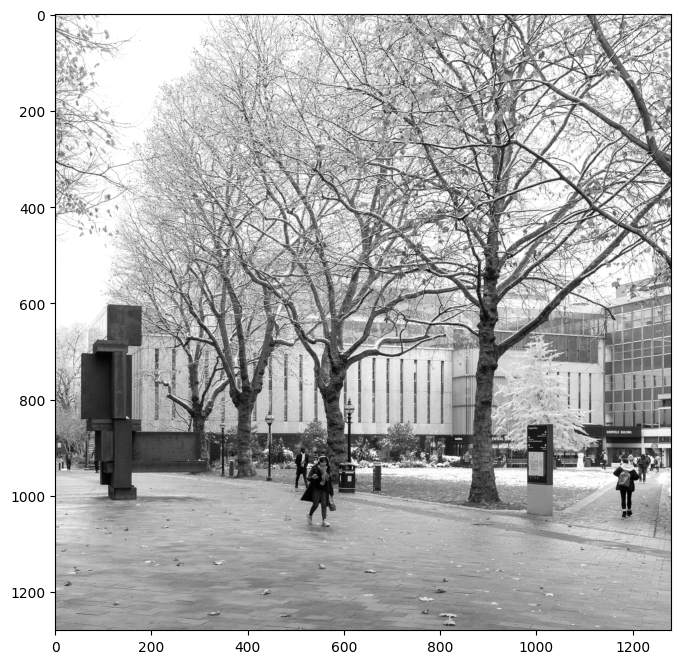

In [2]:
# Read the image (provided)
image = imageio.imread('campus_snow.jpg')
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(8, 8)

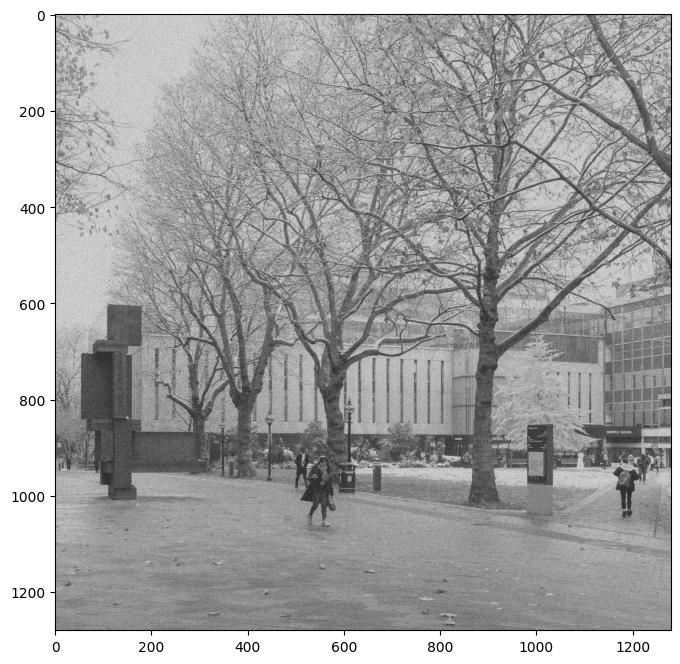

In [3]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### Note: from now on, please use the noisy image as the input for the filters.

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results.

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


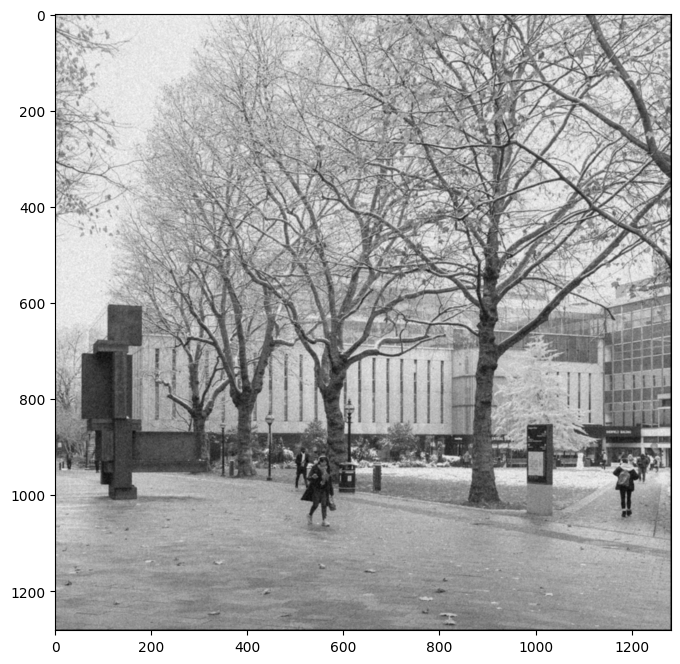

In [10]:
# Design a 3x3 moving average filter.
h = np.full((3,3), 1/9)

# Alternatively, this filter is separable into two filters:
h1 = np.full((3,1), 1/3)
h2 = np.full((1,3), 1/3)

# Performing these one after the other achieves the same result as with the
# original filter, oweing to convolution. However, this shouldn't increase 
# performance drastically becuase we decrease the complexity by an order of 
# magnitude 3.

# Padding automatically applied with mode='full' by default, with boudnary filled
# with fillvalue = 0 by defualt.
# equivalent to $> image_filtered = scipy.signal.convolve2d(image_noisy, h)
image_filtered = scipy.signal.convolve2d(image_noisy, h1)
image_filtered = scipy.signal.convolve2d(image_filtered, h2)

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 1.2 Filter the noisy image with a 11x11 moving average filter.

Filter h:
[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.008

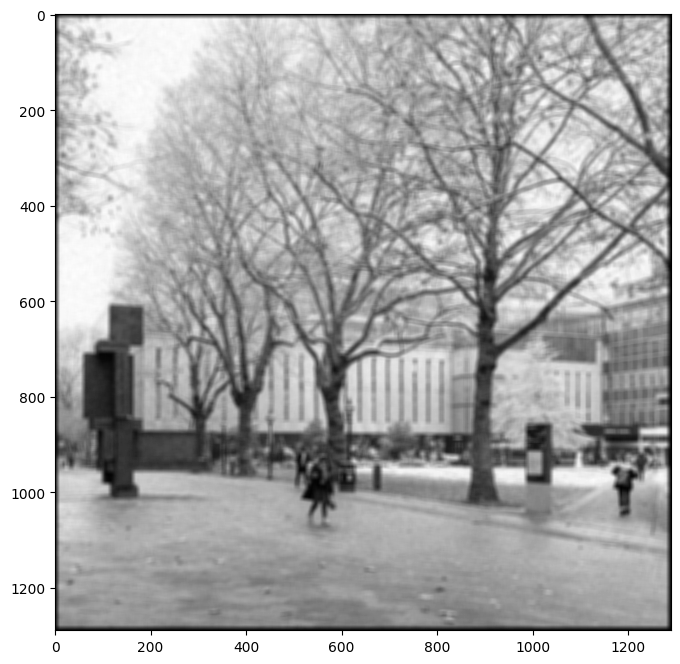

In [11]:
# Design the filter h
h = np.full((11,11),1/11**2)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h)

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results?

### Result Analysis:
Comparing the results, the 3x3 filter produced a less blurry image than the 11x11 filter. Anecdotally, we can conclude that the smaller the size of the kernel the closer the output image is to the original input, and conversely the larger the kernel then the more blurry the image.
As a point of dicussion, this is because a larger area is taken as the average, therefore, by taking a larger area of pixels to average over an area, the image will loose its high-frequency signals, leaving only the low-frequency signals which appear most common in an image over a space in an image.

#### Analysis with respect to edge detection:

Furthermore, I notice that, with the padding settings shipped as default with these functions, the edges of the image appear to have a creeping darness about them. This is because the default is to apply the convolution with a padding of 0s all around the image, allowing for the filter to go enough over the edges of the image to maintain the same dimensions of the image. Yet, this padding means that for larger filters, a larger chunk of 0s is scooped out from beyond the boundaries of the image in an attempt to keep the same image dimensions, resulting in a darker outline.

This means, that when performing edge detection with this sort of padding applied to a moving average filter, the edge deteciton algorithm will identify the perimiter of the image as an edge. This will be a false positive, as in the original image there is no edge in the image itsself - that is, there is no black outline in the original image. Therefore, to prevent these false positives from cropping up we must apply a different padding strategy which will reveal itself later in this document. 

## 2. Edge detection (56 points).

Perform edge detection using Sobel filtering, as well as Gaussian + Sobel filtering.

### 2.1 Implement 3x3 Sobel filters and convolve with the noisy image.

sobel_x:
[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]
sobel_y:
[[ 1.  2.  1.]
 [ 0.  0.  0.]
 [-1. -2. -1.]]


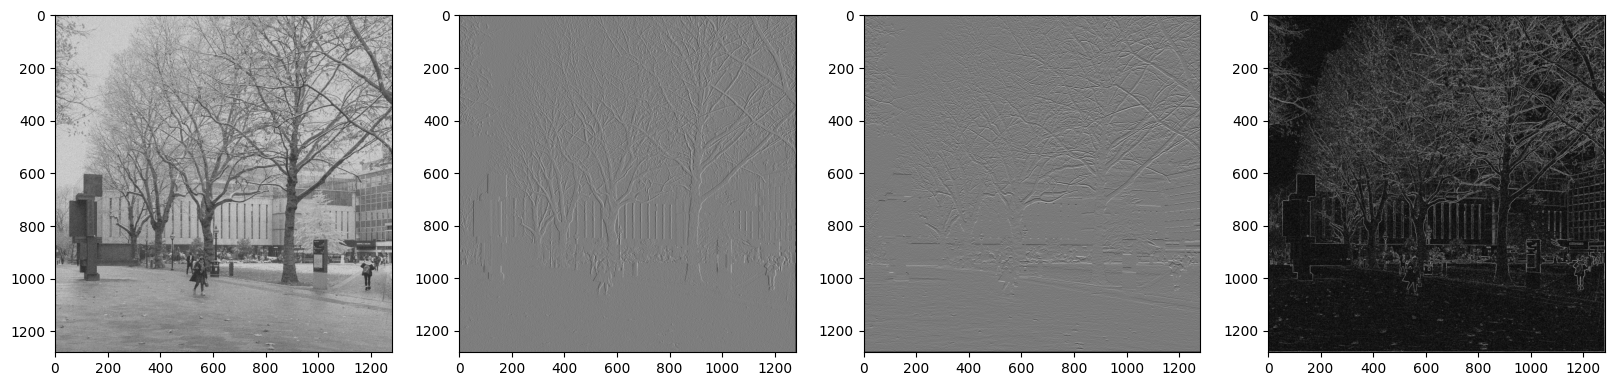

In [12]:
# Design the filters
sobel_x = np.array([[1.,0.,-1.],
                    [2.,0.,-2.],
                    [1.,0.,-1.]])
sobel_y = np.array([[1.,2.,1.],
                    [0.,0.,0.],
                    [-1.,-2.,-1.]])

# Image filtering
sobel_image_x = scipy.signal.convolve2d(image_noisy, sobel_x)
sobel_image_y = scipy.signal.convolve2d(image_noisy, sobel_y)

# Calculate the gradient magnitude
# At each pixel we have two outputs, discontinuity along x-axis, and discontinuity along y-axis
# magnitude of gradient is: g = sqrt(g_x^2 + g_y^2)
grad_mag = np.sqrt(np.square(sobel_image_x) + np.square(sobel_image_y))

# Print the filters (provided)
print('sobel_x:')
print(sobel_x)
print('sobel_y:')
print(sobel_y)

fig = plt.figure(figsize=(20, 40))

fig.add_subplot(1, 4, 1)
plt.imshow(image_noisy, cmap='gray')

fig.add_subplot(1, 4, 2)
plt.imshow(sobel_image_x, cmap='gray')

fig.add_subplot(1, 4, 3)
plt.imshow(sobel_image_y, cmap='gray')

fig.add_subplot(1, 4, 4)
plt.imshow(grad_mag, cmap='gray')

### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$.

The Gaussian Kernel is defined as:
$h(i,j)=\frac{1}{2\pi \sigma^2}e^{-\frac{i^2 + j^2}{2 \sigma^2}}$

From 03_Image_Filtering_I.pdf page 33 the convention calls for us to ignore values outside of the range of $[-k\sigma , k\sigma]$ where the range relates to the distance from the center of the filter. Industry seems to have landed for a value of $k = 3 \vee k = 4$. For the purpose of this exercise we assume a value of $k=3$

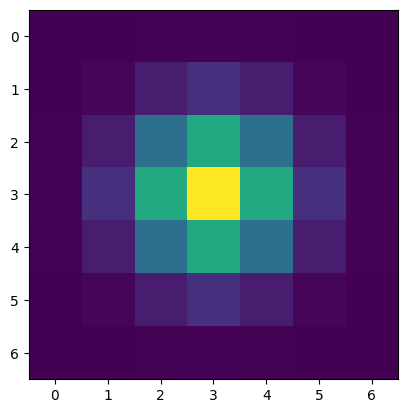

In [16]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    # return: a 2D array for the Gaussian kernel

    # assume the following dimensions (from slides)
    k = 3
    size = 2 * sigma * k + 1

    def gaussian(x, y):
        # Find the offset from the centre of the window given the indecies in the filter
        i : int = abs((size // 2) - x)
        j : int = abs((size // 2) - y)
        # Apply the gaussian formula to the offsets from the centre
        return (1 / (2 * math.pi * sigma ** 2)) * math.e ** (- (i ** 2 + j ** 2) / ( 2 * sigma ** 2))

    # apply generator function to each element in a matrix
    return np.fromfunction(gaussian, (size, size))

# Visualise the Gaussian filter when sigma = 5 pixel (provided)
sigma = 1
h = gaussian_filter_2d(sigma)
plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 5 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Sobel filtering and show the gradient magintude map.

function took 8.91768765449524 s


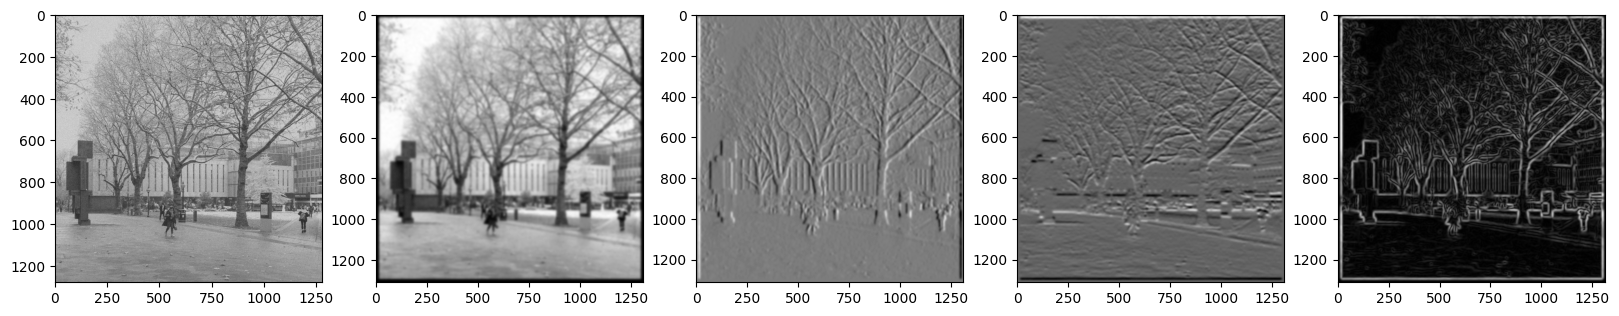

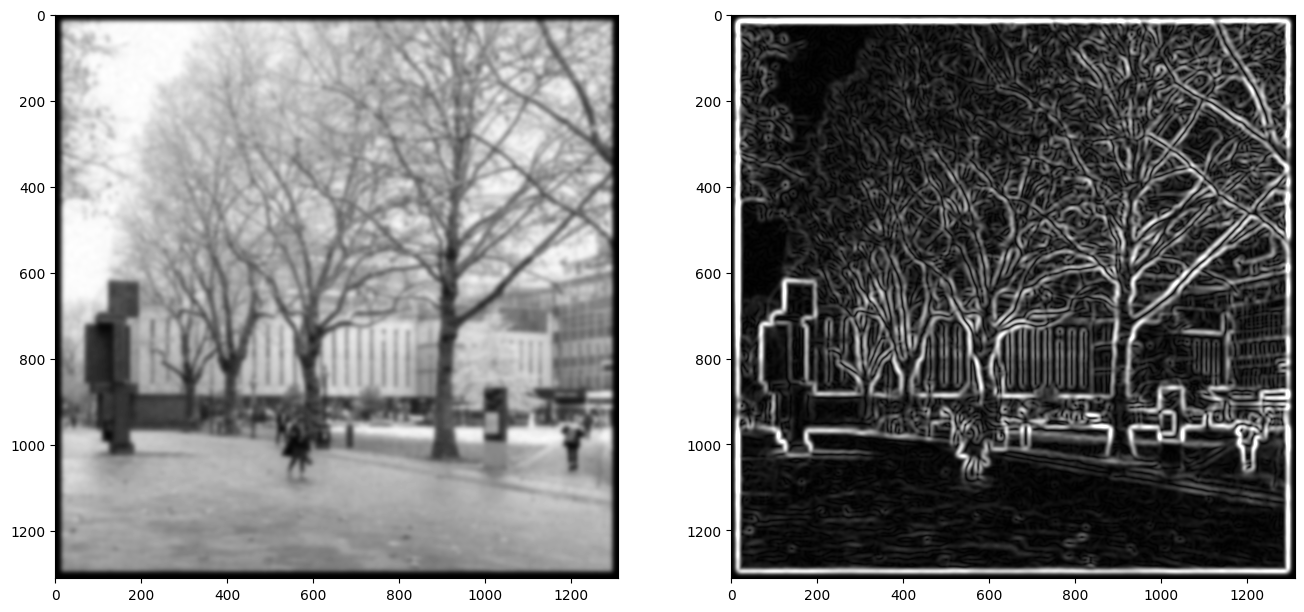

In [38]:
# Construct the Gaussian filter
h = gaussian_filter_2d(5)

fig = plt.figure(figsize=(20, 40))
height = 1
width = 5

# Original noisy image
fig.add_subplot(height, width, 1)
plt.imshow(image_noisy, cmap='gray')

# Perform Gaussian smoothing and count time
start =time.time()
image_smoothed = scipy.signal.convolve2d(image_noisy, h)
end = time.time()
elapsed = end - start
print("function took {} s".format(elapsed))

# smoothed image
fig.add_subplot(height, width, 2)
plt.imshow(image_smoothed, cmap='gray')

# Image filtering
sobel_image_x = scipy.signal.convolve2d(image_smoothed, sobel_x)
sobel_image_y = scipy.signal.convolve2d(image_smoothed, sobel_y)

# sobelx
fig.add_subplot(height, width, 3)
plt.imshow(sobel_image_x, cmap='gray')

# sobely
fig.add_subplot(height, width, 4)
plt.imshow(sobel_image_y, cmap='gray')

# Calculate the gradient magnitude
grad_mag = np.sqrt(np.square(sobel_image_x) + np.square(sobel_image_y))

# gradient magnitude
fig.add_subplot(height, width, 5)
plt.imshow(grad_mag, cmap='gray')

# Display the gradient magnitude map (provided)
fig2 = plt.figure()
fig2.add_subplot(1,2,1)
plt.imshow(image_smoothed, cmap='gray')
fig2.add_subplot(1,2,2)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(16, 8)

### A short discussion raised to the point in 1.3

As mentioned in 1.3, we can see the edges of the image after gaussian blurring have sparked a lot if interest in the sobel filter. In other words, the sobel filters have identified these areas of the image as edges. This turns out to be a false positive in the right most image with the gradient magnitude (notice how the edges of the image are white, wheras we cannot safely assume that there exists an edge there in the real world).

Therefore, we have to apply a different padding algorithm so that the edges don't get mistaken for edges after blurring. 

In order to detect edges, it is critical to maintain the sharpness and location of the edges in the original image. It is possible that false positives can occur during edge detection if padding algorithms don't preserve the contextual values of pixels given an area. This is a unnecessary task for areas of the image beyond its dimensions.

To prevent false positives, padding algorithms like "same" or "reflect" add pixels to the original image in order to prevent the perimiter of an image as being flagged as an edge. This will ensure that the size of the image remains the same and the edges are not altered. In order to maximize the edge response, "same" padding should be chosen over "reflect" padding.

The main bulk of the code remains the same. For your convenience, I will comment areas that I have modified to support this theory:

function took 7.850728511810303 s
image_noisy: (1280, 1280)
grad_mag: (1280, 1280)


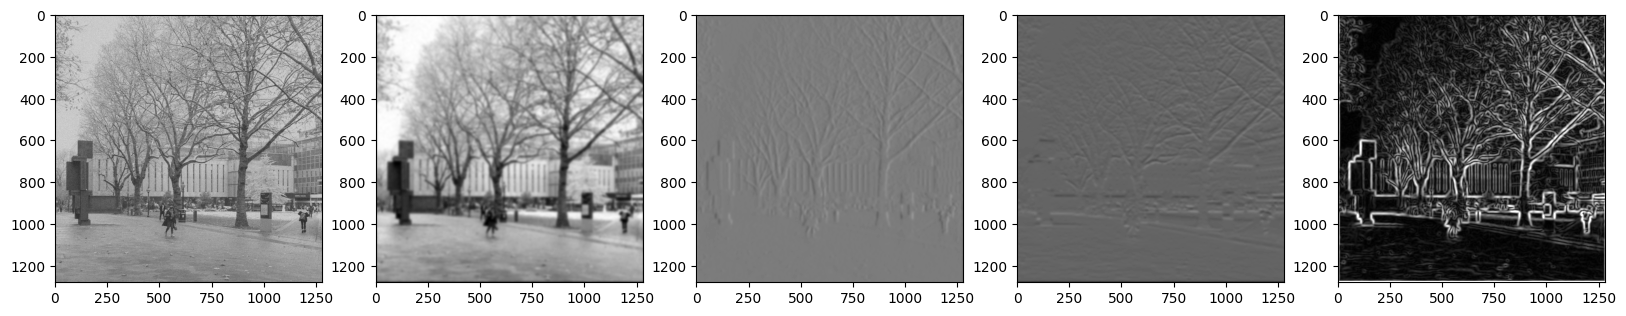

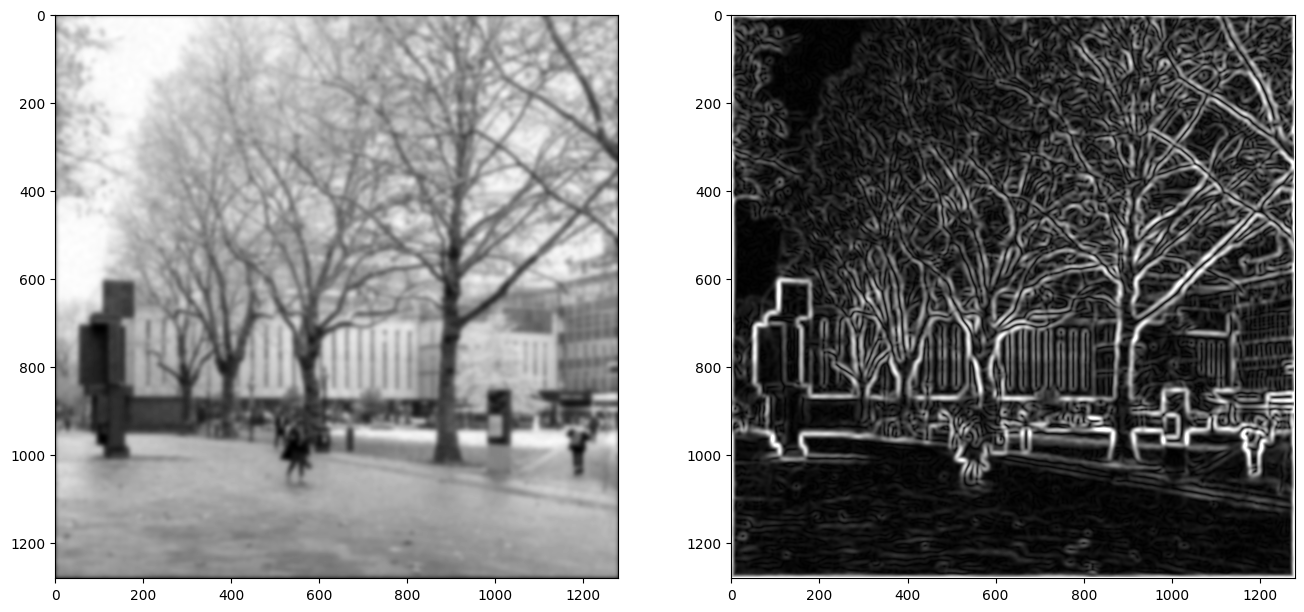

In [43]:
fig = plt.figure(figsize=(20, 40))
height = 1
width = 5

# Original noisy image
fig.add_subplot(height, width, 1)
plt.imshow(image_noisy, cmap='gray')

# Perform Gaussian smoothing and count time
start =time.time()
image_smoothed = scipy.signal.convolve2d(image_noisy, h, mode='same') # padding here set to same
end = time.time()
elapsed = end - start
print("function took {} s".format(elapsed))

# smoothed image
fig.add_subplot(height, width, 2)
plt.imshow(image_smoothed, cmap='gray')

# Image filtering
sobel_image_x = scipy.signal.convolve2d(image_smoothed, sobel_x, mode='same') # difference is negligible here 
sobel_image_y = scipy.signal.convolve2d(image_smoothed, sobel_y, mode='same')

# sobelx
fig.add_subplot(height, width, 3)
plt.imshow(sobel_image_x, cmap='gray')

# sobely
fig.add_subplot(height, width, 4)
plt.imshow(sobel_image_y, cmap='gray')

# Calculate the gradient magnitude
grad_mag = np.sqrt(np.square(sobel_image_x) + np.square(sobel_image_y))

# gradient magnitude
fig.add_subplot(height, width, 5)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)

print("image_noisy: {}".format(image_noisy.shape))
print("grad_mag: {}".format(grad_mag.shape))

print("hence dimensions of the image have been preserved through padding with mode='same'")

# Display the gradient magnitude map (provided)
fig2 = plt.figure()
fig2.add_subplot(1,2,1)
plt.imshow(image_smoothed, cmap='gray')
fig2.add_subplot(1,2,2)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(16, 8)

### Discussion on results

Lol theres still an edge. However, this edge is significantly thinner and closer to the edge of the image. When comparing the smoothed gaussian filter we can see that this is the bayne of the problem with the false positives. By removing the problem at the source we can provide a more accurate estimation where the edges appear in the image. 

The rest of the image can be trimmed/crop the image to remove the padded areas or alternatively false positives can be analysed and removed using a heuristic. For instance:

```(python)
# Crop the result to remove the padded area
image_smoothed = image_smoothed[pad_size:-pad_size, pad_size:-pad_size]
```

where pad_size is the amount of pixels on the edge

### 2.4 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively.

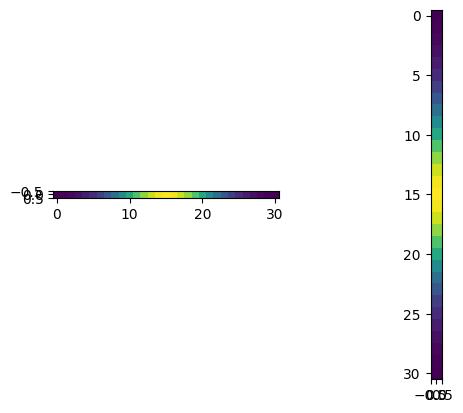

In [39]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    # 
    # return: a 1D array for the Gaussian kernel
    
    # assume the following dimensions (from slides)
    k = 3
    size = 2*sigma*k +1

    def gaussian(i):
        # Calculate the offset of coordinate i from the centre of the array
        x = abs(size // 2 - i)
        return (1 / (math.sqrt(2 * math.pi) * sigma)) * math.e ** (- x ** 2 / (2 * sigma ** 2) )

    return np.fromfunction(lambda x,y: gaussian(y), (1,size))

# sigma = 5 pixel (provided)
sigma = 5

# The Gaussian filter along x-axis. Its shape is (1, sz).
h_x = gaussian_filter_1d(sigma)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
### Insert your code ###
h_y = gaussian_filter_1d(sigma).T

# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.6 Perform Gaussian smoothing ($\sigma$ = 5 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Sobel filtering, show the gradient magnitude map and check whether it is the same as the previous one without separable filtering.

function took 0.8966875076293945 s
average difference between the two: 4.2482566703101387e-13


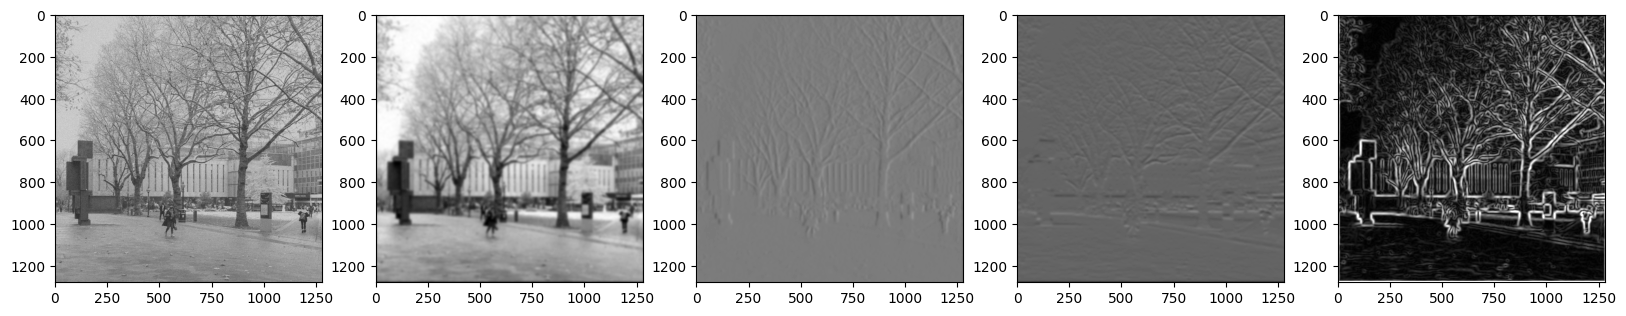

In [46]:
fig = plt.figure(figsize=(20, 40))
height = 1
width = 5

# Original noisy image
fig.add_subplot(height, width, 1)
plt.imshow(image_noisy, cmap='gray')

# Perform separable Gaussian smoothing and count time
h_x = gaussian_filter_1d(sigma)
h_y = gaussian_filter_1d(sigma).T
startSeperable =time.time()
image_smoothed = scipy.signal.convolve2d(image_noisy, h_x, mode='same')
image_smoothed = scipy.signal.convolve2d(image_smoothed, h_y, mode='same')
endSeperable = time.time()
elapsedSeparable = endSeperable - startSeperable
print("function took {} s".format(elapsedSeparable))

# smoothed image
fig.add_subplot(height, width, 2)
plt.imshow(image_smoothed, cmap='gray')

# Image filtering
sobel_image_x = scipy.signal.convolve2d(image_smoothed, sobel_x, mode='same')
sobel_image_y = scipy.signal.convolve2d(image_smoothed, sobel_y, mode='same')

# sobelx
fig.add_subplot(height, width, 3)
plt.imshow(sobel_image_x, cmap='gray')

# sobely
fig.add_subplot(height, width, 4)
plt.imshow(sobel_image_y, cmap='gray')

# Calculate the gradient magnitude
grad_mag2 = np.sqrt(np.square(sobel_image_x) + np.square(sobel_image_y))

# gradient magnitude
fig.add_subplot(height, width, 5)
plt.imshow(grad_mag2, cmap='gray', vmin=0, vmax=100)

# Check the difference between the current gradient magnitude map
# and the previous one produced without separable filtering. You
# can report the mean difference between the two.

diff = np.mean(np.abs(grad_mag - grad_mag2))
print("average difference between the two: {}".format(diff))



### 2.7 Comment on the Gaussian + Sobel filtering results and the computational time.

#### Comment on the Gaussian + Sobel filtering results: 

The Gaussian and sobel filtering results produce a much clearer representation of where the edges are; trivially we see this in the comparisons, with the gaussian filtering producing very bold and clear white lines around the edges of objects. With the moving average, lines are more fine, cluttered and no clear separation from edges regraded as important, and edges regarded as noise contrasts.

#### Computation Time

The computation time of the second version of the gaussian filter is much better than before. As of this run, it is: 0.9355309009552002 s << 9.307631969451904 s with separated gaussian filtering vs normal 2D Gaussian filtering respectively. This makes sense, since without separation the complexity is $O(N^2 K^2)$ and with separation is $O(N^2 K)$. We experience a very large increase in speed becuase, for a fixed $N$ and a varying degree of $K$, in each case for $sigma=5$ $k=31$.

## 3. Challenge: Implement 2D image filters using Pytorch (24 points).

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension $N \times C1 \times X \times Y$, applies the filter and outputs an array of dimension $N \times C2 \times X \times Y$. Here, since we only have one image with one colour channel, we will set $N=1$, $C1=1$ and $C2=1$. You can read the documentation of Conv2D for more detail.

In [49]:
# Import libaries (provided)
import torch

### 3.1 Expand the dimension of the noisy image into $1\times1\times X\times Y$ and convert it to a Pytorch tensor.

In [50]:
# Expand the dimension of the numpy array
newNoisyImage = np.expand_dims(image_noisy, axis=(0,1))
print(newNoisyImage.shape)

# Convert to a Pytorch tensor using torch.from_numpy
image_noisy_tensor = torch.from_numpy(newNoisyImage)

(1, 1, 1280, 1280)


### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 2D Gaussian filter and perform filtering.

In [51]:
# A 2D Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)

# Create the Conv2D filter
filter = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=h.shape, padding=(h.shape[0]//2))
h = torch.from_numpy(h)
filter.weight.data = h.view(1,1,h.shape[0],h.shape[1])

# Filtering
image_filtered = filter(image_noisy_tensor)

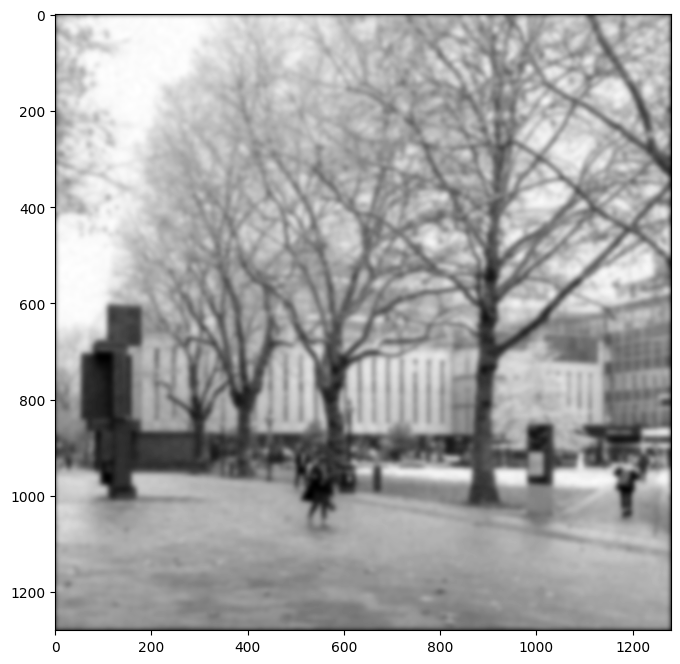

In [52]:
# Display the filtering result (provided)
plt.imshow(np.squeeze(image_filtered.detach().numpy()), cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 3.3 Implement Pytorch Conv2D filters to perform Sobel filtering on Gaussian smoothed images, show the gradient magnitude map.

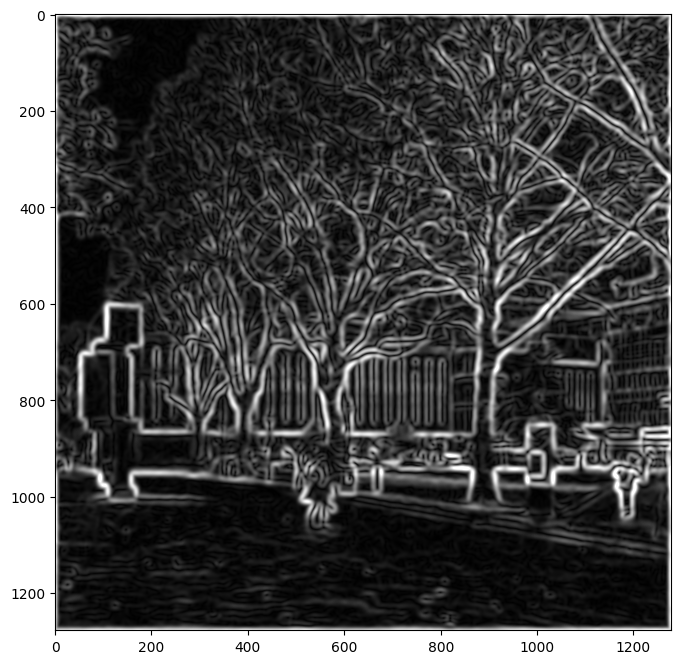

In [53]:
# Create the Conv2D filter
filter_sobel_x = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)
sobel_x_torch = torch.from_numpy(sobel_x)
filter_sobel_x.weight.data = sobel_x_torch.view(1,1,3,3)

filter_sobel_y = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)
sobel_y_torch = torch.from_numpy(sobel_y)
filter_sobel_y.weight.data = sobel_y_torch.view(1,1,3,3)

# Perform filtering
image_filtered_sobel_x = filter_sobel_x(image_filtered)
image_filtered_sobel_y = filter_sobel_y(image_filtered)

# Calculate the gradient magnitude map
iamge_filtered_sobel_x_np = np.squeeze(image_filtered_sobel_x.detach().numpy())
iamge_filtered_sobel_y_np = np.squeeze(image_filtered_sobel_y.detach().numpy())
grad_mag3 = np.sqrt(np.square(iamge_filtered_sobel_x_np) + np.square(iamge_filtered_sobel_y_np))

# Visualise the gradient magnitude map (provided)
plt.imshow(grad_mag3, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)